# The Principles of Statistical Modelling
Before we start discussing simple and multiple regression, it is worth taking some time to understand what we are trying to achieve at a much higher level. Both *simple* and *multiple* regression are examples of *statistical models*. Although your prior experiences may have left the impression that statistics is about *hypothesis tests*, the reality is that statistics is a science concerned with building *models* of data. This concept of model building is *fundamental* to a much deeper understanding of statistics and is fundamental to your success on the rest of this course. As such, we will spend some time here exploring what we mean by a statistical model before we go any further.

## Variance
The starting point for understanding statistical modelling is understanding the concept of *variance*. Variance is the basic currency of statistics. It is the fundamental information that data holds and is the feature of data that all statistical models aim to capture. Variance is therefore a very important concept and so we need to be clear on what *exactly* variance is.

### Defining Variance
Informally, the idea of variance is very simple. For a given set of data, we want to understand the reason why the measured values are different from each other. In other words, why does the data *vary*? If data did not vary, it would be constant. Every time we took a measurement we would get the same value. In this scenario, the data would be *perfectly predictable* and there would be no need for statistics. The fact that data *does* vary is therefore fundamental in order for statistics to operate.

As an example, consider the plot of all the measurements of `mpg` from the `mtcars` dataset[^foot1] shown below. Clearly, the values of `mpg` differ from car-to-car. This is expected, but take a moment to consider all the reasons *why* this is the case? 

In [1]:
options(repr.plot.width=12, repr.plot.height=8)

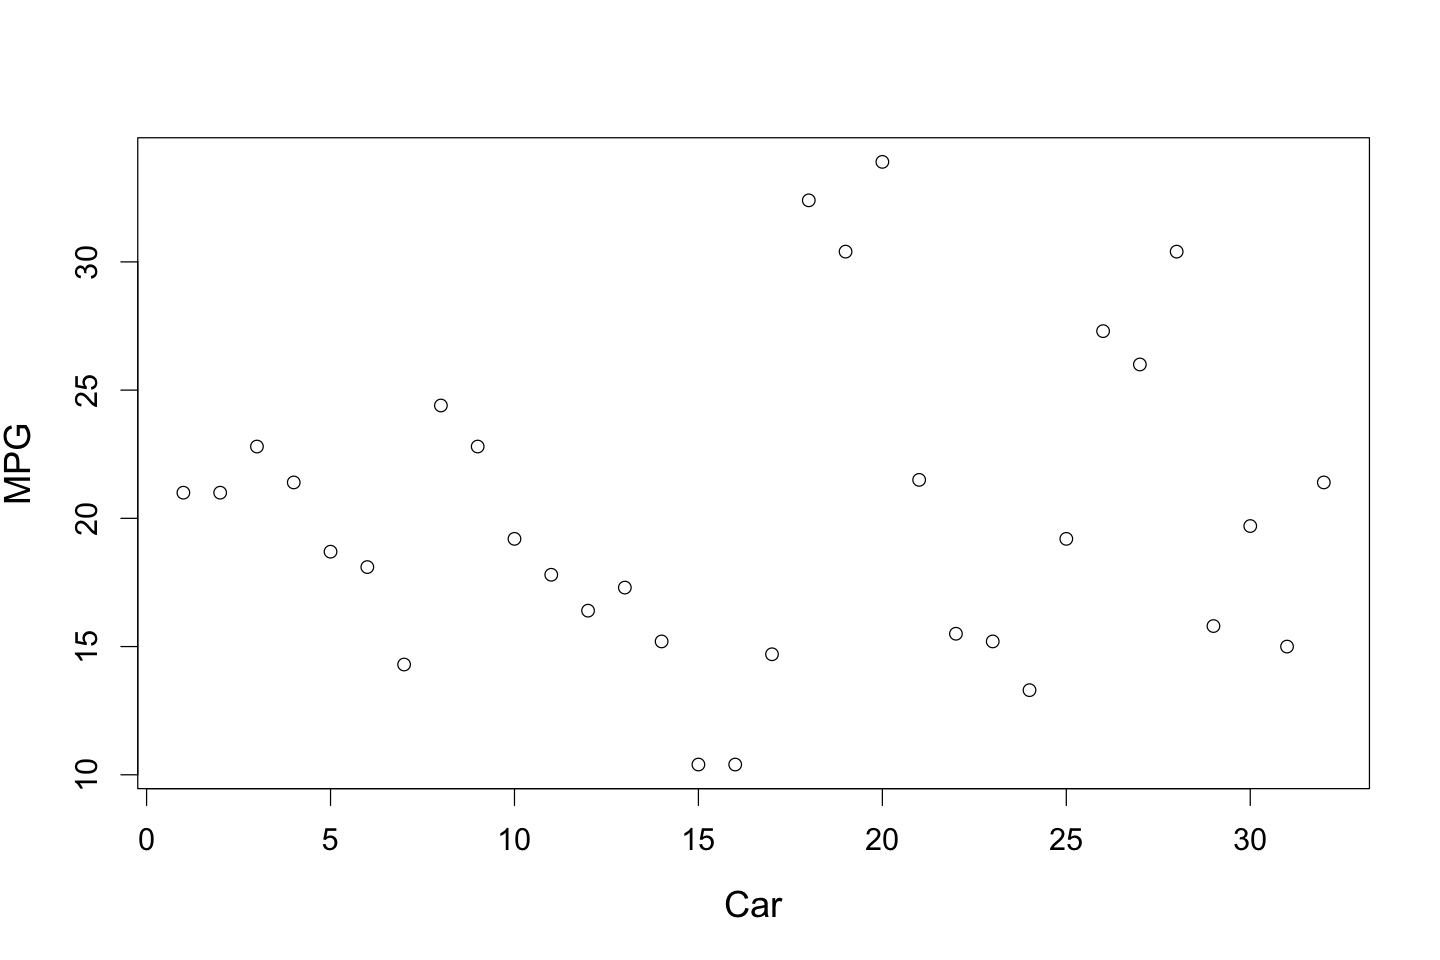

In [2]:
data('mtcars')
attach(mtcars) # Makes the code easier to read, but not a good idea generally!

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mpg)), y=mpg, xlab="Car", ylab="MPG")

```{admonition} Why do different cars have different MPG values?
:class: tip, dropdown
The most obvious answer here is that cars have different properties, such as their weight or their engine size. However, there will also be a degree of natural variation due to limitations in the precision of measurement. Importantly, some of these sources we can measures, whereas others we cannot. This is an important distinction within statistics and is sometimes known as *reducible* versus *irriducible* error.
```

By considering these different possibilities, you are effectively building your own mental model of the observed variance. All statistics does is formalise this process. 


### Measuring Variance
In order to start understanding the variance we can observe, we need some way of *quantifying* it. As mentioned above, our question is really about how far any set of data are from being *constant*. If we consider this to be the definition of *no variance*, then our measure must capture how far away our data are from a constant state. But what constant value should we pick for the comparisons? We could select something arbitrary (e.g. 0, 100, 1000), however (for reasons we will justify further below) the better choice is to use *the mean*.

To see this visually, the mean value of `mpg` is indicated as a horizontal line in the plot below. This provides our *yardstick* to measure variation against. 

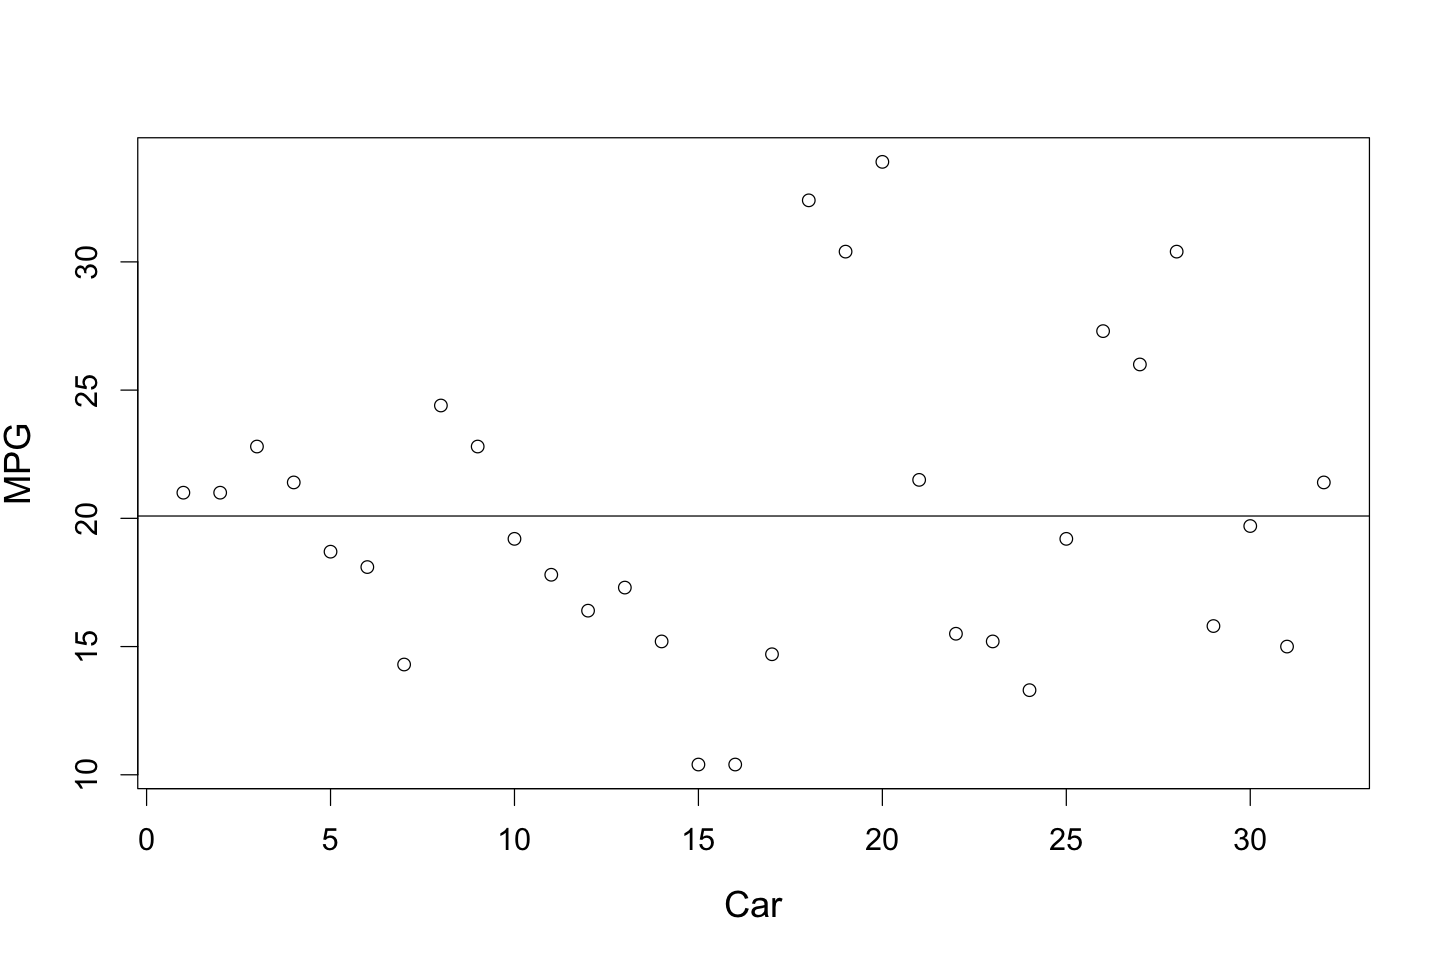

In [3]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mpg)), y=mpg, xlab="Car", ylab="MPG")
abline(h=mean(mpg))

The vertical distances from the mean to each data point therefore tells us how much variation there is to explain. These are shown on the plot below. 

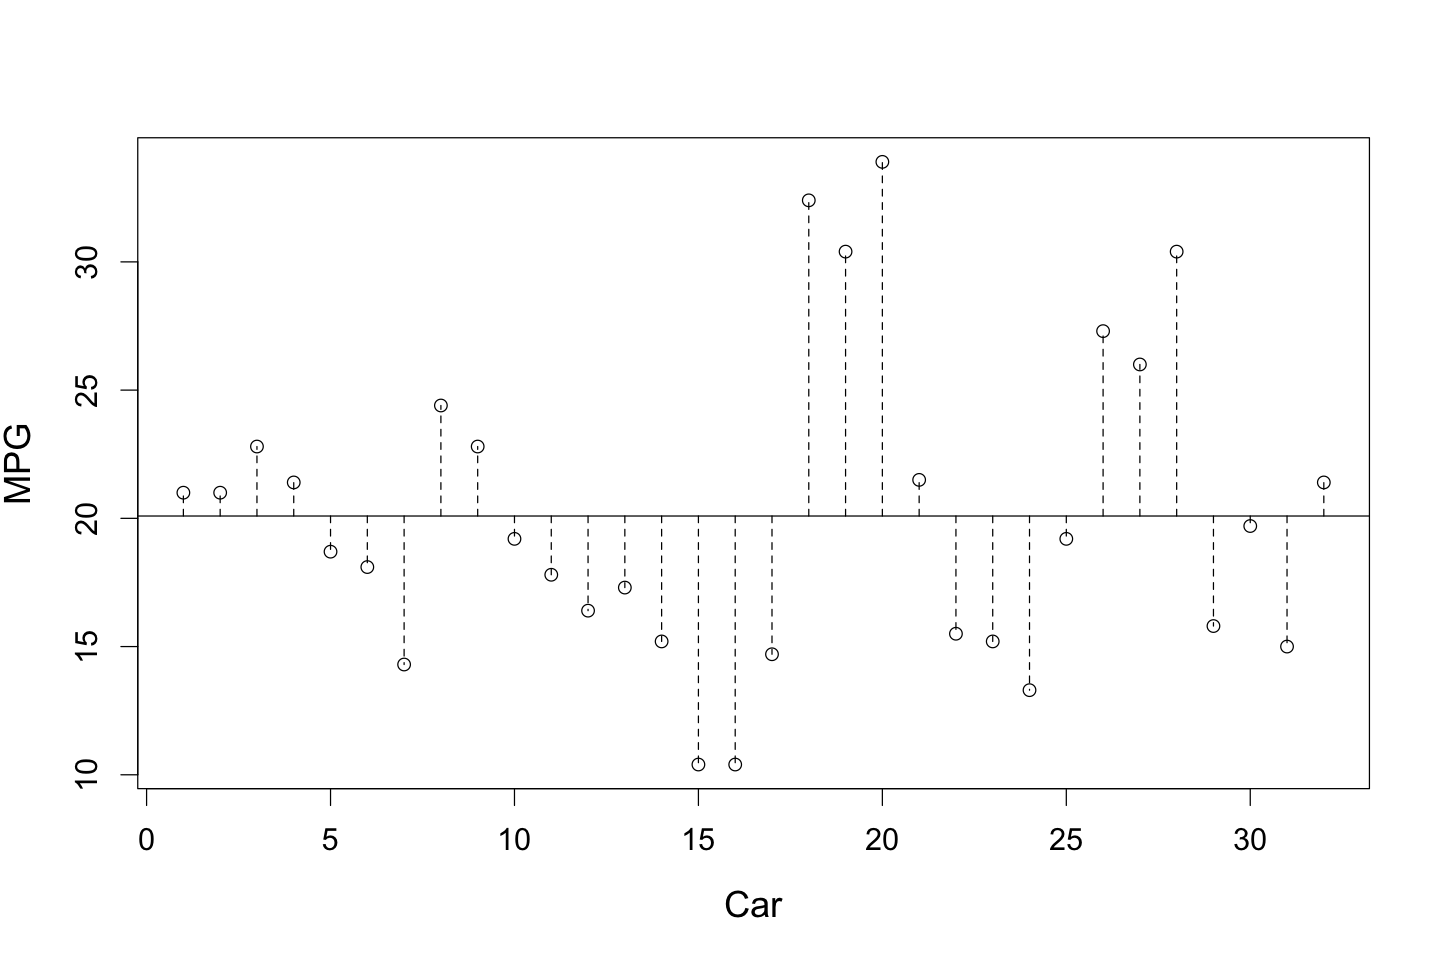

In [4]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(x=seq(1,length(mpg)), y=mpg, xlab="Car", ylab="MPG")
abline(h=mean(mpg))
for (i in seq(1,length(mpg))){
    lines(x=c(i,i), y=c(mean(mpg),mpg[i]), lty=2)
}

For instance, datapoint 1 sits *above* the mean and datapoint 7 sits *below* the mean. Their vertical distances are therefore

In [5]:
mpg[1] - mean(mpg)
mpg[7] - mean(mpg)

[1] 0.909375

[1] -5.790625

In order to get an *overall* sense of the variation across all the cars, we might first think to *sum* these distances. However, if we do that then we get a result that is essentially 0

In [6]:
sum(mpg - mean(mpg))

[1] 1.776357e-14

The problem is that the mean is, by definition, *perfectly* in the middle of all the data and thus all the positve and negative distances will cancel and we will be left with nothing. Instead, we *square* the values[^foot2] before summing them

In [7]:
sum((mpg - mean(mpg))^2)

[1] 1126.047

This provides some indication of the variation in this data set, as it would be 0 if the data were constant. However, it is confounded by the fact that it is sensitive to the number of data points. For instance, we could get the same value from a data set with many data points near to the mean and a data set with a small number data points spread out from the mean. Our visual sense of variance does not depend on the amount of data, rather, it depends upon how far the data are from the mean *in general*. As such, the final step is to divide by the number of data points[^df-foot] to produce an *average* squared distance from the mean.

In [8]:
sum((mpg - mean(mpg))^2) / length(mpg)

[1] 35.18897

From this, we can conclude that the average squared distance from the mean is $35.19$. This is the total amount of *variance* within these data and thus indicates the value that we want to explain. Very generally, the aim of a statistical model is to break this value up into independent chunks that can be attributed to different sources. The magnitude of these chunks relative to the amount that we *cannot* explain gives us an indication of how *meaningful* or *important* these sources are, as well as indicating how well the statistical model is able to predict future values. 

`````{admonition} Interpreting variance and standardising distances
:class: tip
One of the disadvantages of the definition of variance is that it is expressed in squared-units of the variable in question, which can be hard to interpret. As such, when interpretation matters, it is more usual to use $\sigma$ rather than $\sigma^{2}$, by taking the square-root of the variance. This produces a value in the original units of the variable and can be interpreted as the average deviation from the mean. This should be familiar to you as the *standard deviation*. 

Sometimes it is useful to express distances in units of standard deviation, because this makes the description unit-less and thus applicable to lots of different types of data. For instance, we saw above that datapoint 7 was 5.79 MPG below the mean. The standard deviation for this dataset, based on the variance calculated above, is $\sigma = \sqrt{35.19} = 5.93$. If we divide these values, we can express datapoint 7's discrepancy in terms of standard deviations, giving $\frac{-5.79}{5.93} = -0.98$. As such, we can say that datapoint 7 lies 0.98 standard deviations below the mean, irrespective of the original units of the data.
`````

## Probability Models
We have now established that *variance* is the key element of data that we wish to capture. The fact that measured values differ from datapoint-to-datapoint implies an inherent *randomess* and *uncertainty* to real-world data. As such, in order to say anything about the variance in our data, we need some means of formalising this randomness. This formalisation comes from the field of *probability*. 

Unlike the common understanding of the term, *randomness* in probability does not mean completely unstructured and unpredictable. When we say that something happened "randomly", that is often taken as meaning that it could not have been predicted. However, in the more formal world of probabily, the term *random* has a very specific definition that effectively means that something is unpredictable in the short term, but has a *predictable regularity* over the long term. This definition is captured within the concept of a *random variable*.

### Random Variables
A *random variable* refers to any variable whos value changes with each measurement, but whos behaviour over time adheres to a known *probability distribution*. This is an important concept because every value that we measure as part of an experiment is concptualised statistically as a realisation of a given random variable. For instance, we would treat *reaction time* as a random variable, with eached measured value of reaction time representing a realistion of that random variable. Implicit in this is the idea that reaction time adheres to some probability distribution and that our experiment is simply the process of sampling value from that distribution. 

#### Discrete Random Variables
The first class of random variables concern those where the number of possible outcomes is *finite*. For instance, tossing a coin and seeing whether the outcome is either heads or tails. Counting the face values of two dice would also be discrete, because there are only a limited number of outcomes. Indeed, counting anything would be considered discrete because there are only a finite number of possibilities, with no values in-between. In all these cases, we can consider the outcome of the experiment[^probexp] to be a random variable governed by some discrete probability distribution.

The textbook example of this...

A more realistic real-world example would be something like scores on a questionnaire ... Note, however, that psychologists have a bad habit of treating discrete random variables as if they were continuous.

#### Continuous Random Variables
The second class of random variables concern those where the number of possible values is *infinte*. This can either be within an *unbounded* range (so the values can span $-\infty$ to $\infty$), or within a *bounded* range (such as anything between 0 and 1).

To get more of a handle on this concept, we can generate realisations of a random variable in `R`. All we need is to choose a distribution and set the parameters to some values. For instance, to generate 10 realisations of the random variable 

$$
y \sim \mathcal{N}\left(2,1\right)
$$

we can use

In [9]:
y <- rnorm(n=10, mean=2, sd=1)
y

[1] 0.9355338 1.4219563 3.0514984 2.2389369 2.2600893 3.4549063 0.5063118
 [8] 1.7393094 0.3494043 1.1753151

Every variable that we measure can therefore be conceptualised as a *random variable*, drawn from some distribution. This distribution represents the entire *population* of possible values we could measure, with some fixed values for its parameters. Our aim, very generally, is to figure out what those parameter values are, given the data we have available.

`````{admonition} Key Concept
:class: tip
When we conduct an experiment, we concptualise the variables that we are measuring as *random variables*. This means that their values will change with each measurement and are governed by some random process. In this context, *random* means that their behaviour adheres to some probability distribution. As such, the variance in our measurements contains a known structure in terms of the underlying probability distribution. Our experiment is then conceptualised as the process of making random draws from that distribution. The shape of the distribution is governed by a number of *parameters*, which are conceptualised as *fixed constants* of the population we are drawing samples from. Our aim, very generally, is to use the information in the sample to estimate those population parameter values. This is how a statistical model attempts to explain the seemingly random variations in real-world measurements.
`````

### Structured and Random Elements of Distributions
We can think of all probability distributions as have a *structured* and *random* element. The structured element is *deterministic* and defines the value we would expect on average. The random element defines the degree to which the values do not adhere to the structured element, due to natural variation and error. 

As an example, a normal distribution is defined by the *mean* and the *variance*. The mean is the structured part and the variance is the random element. Every value we draw from a normal distribution can be conceptualised as a combination of the structured part of the distribution, plus a degree of randomness. For instance, take the distribution

$$
y \sim \mathcal{N}\left(\mu,\sigma^{2}\right)
$$

with $\mu = 2$ and $\sigma^{2} = 1$. Imaging that we then sampled a value of 5. We can think of this as being the mean plus some random variation $\epsilon$

$$
y_{1} = \mu + \epsilon_{1} = 2 + 3 = 5.
$$

Imagine that we then sampled a value of 0.5. We can think of this as

$$
y_{2} = \mu + \epsilon_{2} = 2 + -1.5 = 0.5.
$$

So notice that there is an element that is *constant* across measurements and an element that *changes* with each measurement. In this way, every single data value *contains* the structured element of the distribution. This is a *constant* that is true across all the data. As such, it is the random element $\epsilon$ that has probabilistic behaviour. If we remove the structured element, all we do in centre the data around 0, but we do not remove any of the randomness. We can see this below for `mpg`.

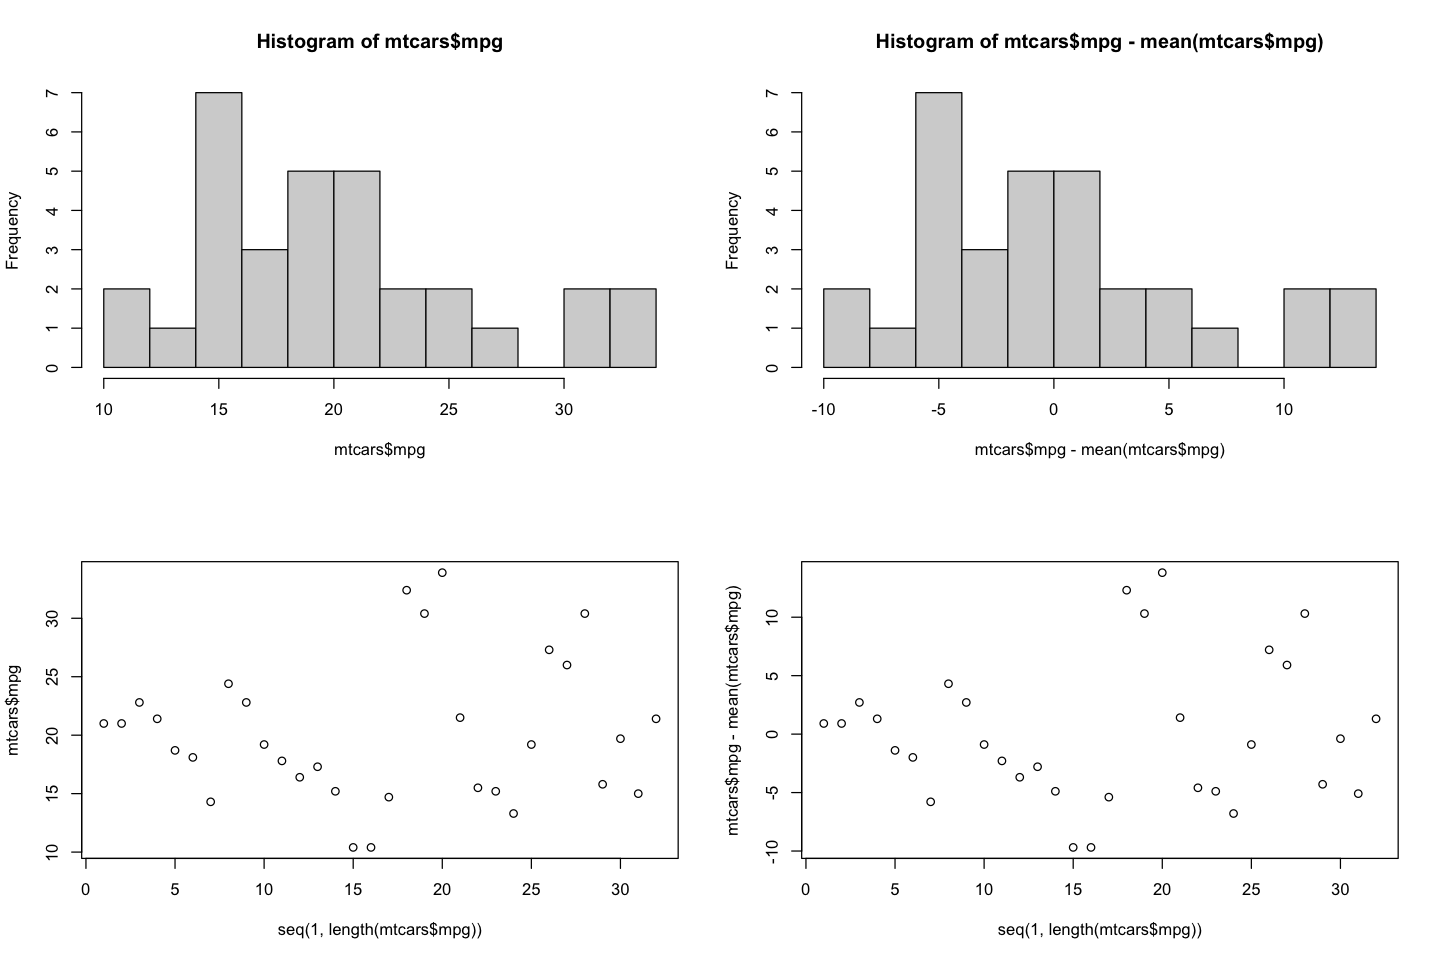

In [10]:
par(mfrow=c(2,2))

hist(mtcars$mpg, breaks=10)
hist(mtcars$mpg - mean(mtcars$mpg), breaks=10)

plot(seq(1,length(mtcars$mpg)), mtcars$mpg)
plot(seq(1,length(mtcars$mpg)), mtcars$mpg-mean(mtcars$mpg))

Because of this, we can also express the probability model

$$
y_{i} \sim \mathcal{N}\left(\mu,\sigma^{2}\right)
$$

as

$$
\begin{align*}
y_{i} &= \mu + \epsilon_{i} \\
\epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align*}
$$

The important point here is that we can think of the structured element as representing something that is true across all the datapoints and thus represents some universal truth of the variable we are measuring. The random element represents all the reasons why the data deviates from this universal truth. From the perspective of statistical modelling, it is this universal truth that we want to capture as it suggests that there is something that is true across all our data that explains some of the observed variation. Anything left over is indicative of random deviations that are specific to each datapoint and thus do not represent any form of universal truth.



We can think of the *mean* as a very basic model of the data. It is a model that predicts a constant value for `mpg` from every car. The degree to which this is not true indicates the degree to which the data is *not* constant and thus quantifies the raw amount of variance in the data.

### Normal Probability Models

$$
y \sim \mathcal{N}\left(\mu,\sigma^{2}\right)
$$

as such, the expected value of $y$ is

$$
E\left(y\right) = \mu
$$

and its variance is

$$
\begin{align*}
    \text{Var}\left(y\right) &= E\left[\left(y - E\left[y\right]\right)^{2}\right] \\ 
                             &= E\left[\left(y - \mu\right)^{2}\right]             \\
                             &= \sigma^{2}
\end{align*}
$$

The plot below is a 3D interactive visualisation of a normal probability model applied to the measures of `mpg` from the `mtcars` dataset. Using the sample mean and variance as estimates of the population at-large, this model implies

$$
\text{MPG}_{i} \sim \mathcal{N}\left(20.09,36.32\right).
$$

Thus, irrespective of the car in question, each value of `mpg` is conceptualised as a random draw from a normal distribution with a mean of 20.09 and a variance of 36.32.

In [11]:
library(rgl)

# Data
data('mtcars')
n     <- length(mtcars$mpg)
mu    <- mean(mtcars$mpg)
sigma <- sd(mtcars$mpg)

# Open 3D window
open3d()

# Set the desired ranges
xlim <- c(1,n)
ylim <- c(0,50)
zlim <- c(0,.2)

# Plot invisible points to define the bounds
plot3d(NA, xlim=xlim, ylim=ylim, zlim=zlim,
       type="n", axes=FALSE, xlab="", ylab="", zlab="")

# Plot the 3D scatter plot
points3d(seq(1,n), mtcars$mpg, rep(0,n), col="red", size=5)

# Overlay the 1D normal distribution curves
n.norms <- seq(1, n, length.out=7)

for (i in seq(1,length(n.norms))){
  # Curve data
  x.val   <- n.norms[i]
  y_curve <- seq(ylim[1], ylim[2], length.out=200)
  x_curve <- rep(x.val, length(y_curve))
  z_curve <- dnorm(y_curve, mean=mu, sd=sigma)
  
  # Normal curve
  lines3d(x_curve, y_curve, z_curve, col="blue", lwd=3)
  
  # Mean line
  lines3d(c(x.val,x.val), c(mu,mu), c(0,max(z_curve)), lwd=2, col="green3")
}

# Grand mean line
lines3d(c(0,n),c(mu,mu),c(0,0), lwd=2)

# Add axes and grid
axes3d(edges=c("x--","y--"), col="black")
grid3d(c("z"), col="gray")

# Add axis labels
mtext3d("Car", edge = "x--", line = 5)
mtext3d("MPG", edge = "y--", line = 5)

#==================================================#
# Adjust the viewport (only needed for the lesson) #
#==================================================#
mat       <- par3d("userMatrix")
nmat      <- mat
nmat[2,4] <- mat[2,4] + 15  # Move 10 along y

# Apply the new matrix to shift the camera
par3d(userMatrix=nmat)

# Zoom in
par3d(zoom=0.55)

glX 
  1 

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


In [12]:
# Generate a HTML widget for embedding in the lesson
rglwidget(width=772)

HTML widgets cannot be represented in plain text (need html)

Now, the degree to which this is a *good* model is not something we are concerned with at this moment. But we should be thinking of this as our proposed *data generating process*. If the data appears to adhere to this model, then we can assume that we have capture some element of how the data values came to be. The better the model fit, the more confidence we have that this conceptualisation of MPG as a normal random variate is reflective of reality. Remember, however, that this is still a *model*. As George Box said: "All models are wrong, but some are useful". As such, we do not expect this to work perfectly, however, the aim is that we can get it close enough to be useful.

`````{admonition} Range of visualised distributions
:class: important
Be aware that the normal distributions in the plot above have only be drawn for 7 of the values along the $x$-axis. The model we are using assumes a normal distribution for *every* $x$-value. In context, this would mean for *every car*. However, if we consructed the plot this way it would be too crowded and difficult to interpret. So just make sure you recognise that the distributions are *examples* and do not show the complete model.
`````

## Parametric Statistical Models

The fundamental elements of parametric statistical model are therefore:

- An assumed probability distribution for the data
- A mean function containing *parameters* that define the expected value of the distribution
- A variance function that captures the deviations from the expected value (the errors)

Our basic example of using the mean as a model would result in

$$
y_{i} \sim \mathcal{N}\left(\mu,\sigma\right)
$$

The mean of the distribution defines a degree of *structure* within the data, whereas the variance term captures the degree to which the data differs from this structure. For instance, the *mean* is a very simple model that captures the structure of the data in terms of its *scaling*. We can think of the mean as capturing the *constant offset from 0* inherent in the units of the data. Without any other information, this is the most we can say.

### The Modelling Process

```{figure} images/modelling-complete-v.png
---
width: 300px
name: modelling-fig
---
Flowchart of the general procedure for parametric statistical modelling.
```

### Linear Models
The vast majority of methods we will be considering on this course can be subsumed under the topic of Statistical Linear Models.


`````{topic} Section Summary
In this section, we have explored the general framework under which the vast majority of analyses in this course will be based.
`````

[^foot1]: The `mtcars` dataset is included with `R` and contains various measurements from a sample of cars. You can read more about it by typing `?mtcars` at the prompt.

[^foot2]: You might think that taking the *absolute value* of the data before summing would make more sense. This is a metric known as the *mean absolute deviation* (MAD), which is a perfectly legitimate way of measuring the *spread* of data around a central point. However, using squared values has some useful properties. Firstly, it *emphasises* larger distances in the sum, which emphasises the importance of bigger discrepancies from the mean. From a mathematical perspective, squares are also easier to work with and manipulate compared to something like the absolute value.

[^df-foot]: You may know that it is more typical to divide by $n-1$ rather than $n$. When working with an *estimate* of the mean, using $n-1$ leads to an *unbiased* estimate of the variance. However, this is a somewhat ancilliary point that is not all that important for understanding the nature of variance.

[^probexp]: Note that an "experiment" in the context of probability theory has a much broader definition than we would typically use in science.